In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import matplotlib.ticker as mtick
from statsmodels.stats.outliers_influence import variance_inflation_factor

Update data in 2 excel file
- feed has 2 sheets 1.Feed, 2.Baseline
- predict
<br>No need to enter values inside script while running
<br>make sure month in predit.xlsv is in small letters

In [2]:
df=pd.read_excel(r'C:\Users\ROHP\Downloads\Works\Predictive Analysis\Sales Order Development\To Predict 25-30 Realized orders\feed.xlsx','Feed')
df.head()

,Year,Month,Region,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th,OO_net_on_MonthEnd
0,2021,march,America,13.75,115.88,397.93,531.16
1,2021,april,America,9.58,103.87,374.82,508.42
2,2021,may,America,29.83,105.45,356.24,491.41
3,2021,june,America,10.70,93.08,368.24,486.61
4,2021,july,America,8.96,131.16,399.09,547.58


In [3]:
look_up = {'january':'01','february': '02','march': '03','april': '04','may': '05',
            'june':'06','july': '07','august': '08','september': '09','october': '10','november': '11','december': '12'}

df['Month'] = df['Month'].apply(lambda x: look_up[x])

In [4]:
df=df.sort_values(['Year','Month'],ascending=(True,True)).reset_index(drop=True)
df

,Year,Month,Region,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th,OO_net_on_MonthEnd
0,2021,03,America,13.75,115.88,397.93,531.16
1,2021,03,APAC,8.93,57.21,186.48,259.12
2,2021,03,EMA,10.46,128.38,336.31,516.09
3,2021,04,America,9.58,103.87,374.82,508.42
4,2021,04,APAC,13.39,49.70,187.07,251.84
5,2021,04,EMA,5.08,115.64,292.42,417.69
6,2021,05,America,29.83,105.45,356.24,491.41
7,2021,05,APAC,8.12,48.90,171.55,236.71
8,2021,05,EMA,6.39,122.91,298.56,470.76
9,2021,06,America,10.70,93.08,368.24,486.61


In [5]:
dummy=(pd.get_dummies(df.Region))
dummy

,APAC,America,EMA
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0
5,0,0,1
6,0,1,0
7,1,0,0
8,0,0,1
9,0,1,0


In [6]:
merged1=pd.concat([dummy,df], axis='columns')
merged1.head()

,APAC,America,EMA,Year,Month,Region,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th,OO_net_on_MonthEnd
0,0,1,0,2021,03,America,13.75,115.88,397.93,531.16
1,1,0,0,2021,03,APAC,8.93,57.21,186.48,259.12
2,0,0,1,2021,03,EMA,10.46,128.38,336.31,516.09
3,0,1,0,2021,04,America,9.58,103.87,374.82,508.42
4,1,0,0,2021,04,APAC,13.39,49.70,187.07,251.84


In [1]:
df1=merged1.drop(['Region','APAC'],axis='columns')
df1.head()

NameError: name 'merged1' is not defined

In [8]:
x=df1.drop(['OO_net_on_MonthEnd'],axis='columns') #,'Confirmed OO_net_on_25th','Unconfirmed OO_net_on_25th'
y=df1['OO_net_on_MonthEnd']

In [9]:
lr=linear_model.Lasso().fit(x,y)

In [10]:
df1.corr()

,America,EMA,Year,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th,OO_net_on_MonthEnd
America,1.000000e+00,-5.000000e-01,-2.048091e-15,0.111086,0.420669,0.670228,0.600609
EMA,-5.000000e-01,1.000000e+00,1.050112e-14,0.220288,0.422444,0.211476,0.334618
Year,-2.048091e-15,1.050112e-14,1.000000e+00,0.586348,0.147020,0.301818,0.226932
Unconfirmed OO_net_on_25th,1.110860e-01,2.202875e-01,5.863479e-01,1.000000,0.455010,0.432633,0.456737
Confirmed OO_net_on_25th,4.206694e-01,4.224435e-01,1.470199e-01,0.455010,1.000000,0.759455,0.879240
OO_net_on_25th,6.702284e-01,2.114760e-01,3.018178e-01,0.432633,0.759455,1.000000,0.966396
OO_net_on_MonthEnd,6.006095e-01,3.346181e-01,2.269323e-01,0.456737,0.879240,0.966396,1.000000


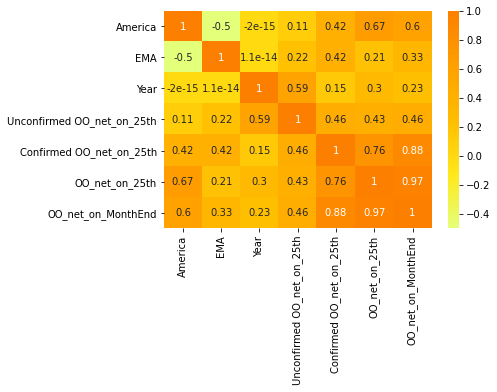

In [11]:
corr=df1.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [12]:
x.head()

,America,EMA,Year,Month,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th
0,1,0,2021,03,13.75,115.88,397.93
1,0,0,2021,03,8.93,57.21,186.48
2,0,1,2021,03,10.46,128.38,336.31
3,1,0,2021,04,9.58,103.87,374.82
4,0,0,2021,04,13.39,49.70,187.07


In [13]:
X=x[['America','Confirmed OO_net_on_25th','Unconfirmed OO_net_on_25th','EMA','Month','OO_net_on_25th']] #
X['Month']=X['Month'].astype(int)
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
#df1=df1.iloc[:,:-1]
vif_scores(X)

<ipython-input-13-a009338980fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Month']=X['Month'].astype(int)


,Independent Features,VIF Scores
0,America,5.927334
1,Confirmed OO_net_on_25th,24.399016
2,Unconfirmed OO_net_on_25th,2.806123
3,EMA,4.799099
4,Month,4.443348
5,OO_net_on_25th,33.114507


In [14]:
X=x[['Year','Confirmed OO_net_on_25th','Unconfirmed OO_net_on_25th','OO_net_on_25th']] #
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
#df1=df1.iloc[:,:-1]
vif_scores(X)

,Independent Features,VIF Scores
0,Year,11.874803
1,Confirmed OO_net_on_25th,20.095425
2,Unconfirmed OO_net_on_25th,2.480119
3,OO_net_on_25th,27.663772


In [15]:
print(lr.coef_)
print(lr.intercept_)

[-0.          7.71893554 -0.          1.1201596  -0.          1.28059315
  1.01749583]
-15.838335827336948


Predict

In [16]:
p=pd.read_excel(r'C:\Users\ROHP\Downloads\Works\Predictive Analysis\Sales Order Development\To Predict 25-30 Realized orders\predict.xlsx')
p.head()

,Year,Month,Region,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th
0,2022,february,America,17.13,81.08,456.19
1,2022,february,APAC,14.44,37.94,162.82
2,2022,february,EMA,33.79,99.03,374.66


In [17]:
look_up = {'january':'01','february': '02','march': '03','april': '04','may': '05',
            'june':'06','july': '07','august': '08','september': '09','october': '10','november': '11','december': '12'}

p['Month'] = p['Month'].apply(lambda x: look_up[x])

dummyp1=(pd.get_dummies(p.Region))

mergedp1=pd.concat([dummyp1,p], axis='columns')

p1=mergedp1.drop(['Region','APAC'],axis='columns')
p1.head()

,America,EMA,Year,Month,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th
0,1,0,2022,02,17.13,81.08,456.19
1,0,0,2022,02,14.44,37.94,162.82
2,0,1,2022,02,33.79,99.03,374.66


In [18]:
#p1=p1.drop(['Confirmed OO_net_on_25th','Unconfirmed OO_net_on_25th'],axis='columns')
p1

,America,EMA,Year,Month,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th
0,1,0,2022,02,17.13,81.08,456.19
1,0,0,2022,02,14.44,37.94,162.82
2,0,1,2022,02,33.79,99.03,374.66


In [19]:
pr=p
a=pd.DataFrame(lr.predict(p1),columns=['Predicted_OO_net_on_MonthEnd'])
pr['Predicted_OO_net_on_MonthEnd']=a['Predicted_OO_net_on_MonthEnd'].round(2)
pr

,Year,Month,Region,Unconfirmed OO_net_on_25th,Confirmed OO_net_on_25th,OO_net_on_25th,Predicted_OO_net_on_MonthEnd
0,2022,02,America,17.13,81.08,456.19,554.40
1,2022,02,APAC,14.44,37.94,162.82,200.66
2,2022,02,EMA,33.79,99.03,374.66,502.15


In [20]:
(pr['Predicted_OO_net_on_MonthEnd']-pr['OO_net_on_25th']).round(decimals=1),round(pr['Predicted_OO_net_on_MonthEnd'].sum()-pr['OO_net_on_25th'].sum(),1)

(0     98.2
 1     37.8
 2    127.5
 dtype: float64,
 263.5)

In [21]:
pr['Predicted_OO_net_on_MonthEnd'].sum()

1257.21

In [22]:
america_df=df[(df['Region']=='America')]
america_past_3_months_df=america_df.tail(3)

america_Percentages=list(((america_past_3_months_df['OO_net_on_MonthEnd']-america_past_3_months_df['OO_net_on_25th'])*100/america_past_3_months_df['OO_net_on_25th']).round(1))
for i in range(len(pr['Region'])):
    if pr['Region'][i]=='America':
        b=((pr['Predicted_OO_net_on_MonthEnd'][i]-pr['OO_net_on_25th'][i])*100/pr['OO_net_on_25th'][i]).round(1)
        break;
america_Percentages.append(b)
#america_Percentages

america_past_3_months_df['Y-M']=america_past_3_months_df['Year'].astype(str) + '-' + america_past_3_months_df['Month'].astype(str)
pr['Y-M']=pr['Year'].astype(str) + '-' + pr['Month'].astype(str)

k1=list(america_past_3_months_df['Y-M'])
k1=k1+(list(pr['Y-M'].unique()))
q1=america_Percentages
k1,q1

<ipython-input-22-e9aadce4a9f6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america_past_3_months_df['Y-M']=america_past_3_months_df['Year'].astype(str) + '-' + america_past_3_months_df['Month'].astype(str)


(['2021-09', '2021-10', '2021-11', '2021-12'], [58.8, 43.7, 29.3, 27.0])

In [23]:
'''
look_up = {:'Jan':'01',:'Feb': '02','03':'Mar': '03','04':'Apr','05':'May',
            '06':'Jun','07':'July','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}

'''

"\nlook_up = {:'Jan':'01',:'Feb': '02','03':'Mar': '03','04':'Apr','05':'May',\n            '06':'Jun','07':'July','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}\n\n"

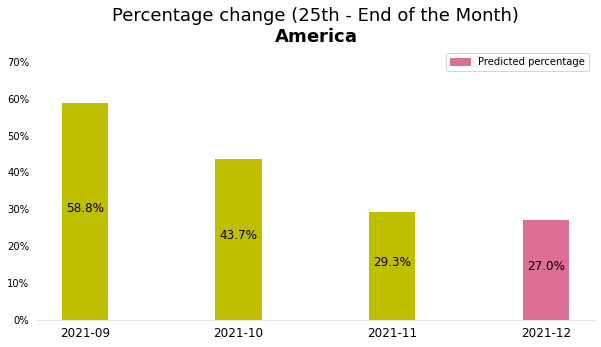

In [24]:
def addlabelsk(x,y):
    for i in range(len(x)):
        plt.text(i, (y[i]-(0.5*y[i])), str(y[i])+'%', ha = 'center',fontsize=12,color='Black',fontstyle='normal')

plt.figure(figsize = (10,5))
xpos=np.arange(len(k1))
plt.bar(xpos,q1,width=0.3,color=('y','y','y','palevioletred'))
plt.xticks(xpos,k1,fontsize=12)
addlabelsk(k1,q1)

ax=plt.gca()
plt.title('Percentage change (25th - End of the Month)\n' r"$\bf{"'America'"}$",fontsize=18,color='Black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
plt.ylim(0, max(q1)+15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
legend = plt.legend(['Predicted percentage'])
legend.get_patches()[0].set_color('palevioletred')

#plt.legend(['Observed', 'Predicted'])
plt.savefig(r'C:\Users\ROHP\Downloads\Works\Predictive Analysis\Sales Order Development\To Predict 25-30 Realized orders\America percentage-Lasso.jpg', dpi=240, bbox_inches='tight')

In [25]:
APAC_df=df[(df['Region']=='APAC')]
APAC_past_3_months_df=APAC_df.tail(3)

APAC_Percentages=list(((APAC_past_3_months_df['OO_net_on_MonthEnd']-APAC_past_3_months_df['OO_net_on_25th'])*100/APAC_past_3_months_df['OO_net_on_25th']).round(1))
for i in range(len(pr['Region'])):
    if pr['Region'][i]=='APAC':
        b=((pr['Predicted_OO_net_on_MonthEnd'][i]-pr['OO_net_on_25th'][i])*100/pr['OO_net_on_25th'][i]).round(1)
        break;
APAC_Percentages.append(b)

APAC_past_3_months_df['Y-M']=APAC_past_3_months_df['Year'].astype(str) + '-' + APAC_past_3_months_df['Month'].astype(str)
pr['Y-M']=pr['Year'].astype(str) + '-' + pr['Month'].astype(str)

k2=list(APAC_past_3_months_df['Y-M'])
k2=k2+(list(pr['Y-M'].unique()))
q2=APAC_Percentages
k2,q2

<ipython-input-25-bd4b8765b3a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APAC_past_3_months_df['Y-M']=APAC_past_3_months_df['Year'].astype(str) + '-' + APAC_past_3_months_df['Month'].astype(str)


(['2021-09', '2021-10', '2021-11', '2021-12'], [45.8, 41.8, 24.4, 24.4])

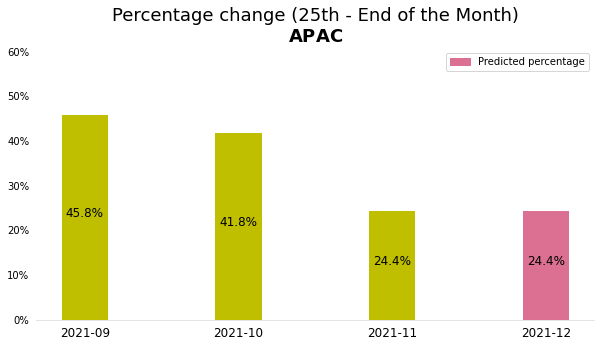

In [26]:
def addlabelsk(x,y):
    for i in range(len(x)):
        plt.text(i, (y[i]-(0.5*y[i])), str(y[i])+'%', ha = 'center',fontsize=12,color='Black',fontstyle='normal')

plt.figure(figsize = (10,5))
xpos=np.arange(len(k2))
plt.bar(xpos,q2,width=0.3,color=('y','y','y','palevioletred'))
plt.xticks(xpos,k2,fontsize=12)
addlabelsk(k2,q2)

ax=plt.gca()
plt.title('Percentage change (25th - End of the Month)\n' r"$\bf{"'APAC'"}$",fontsize=18,color='Black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
plt.ylim(0, max(q2)+15)
legend = plt.legend(['Predicted percentage'])
legend.get_patches()[0].set_color('palevioletred')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig(r'C:\Users\ROHP\Downloads\Works\Predictive Analysis\Sales Order Development\To Predict 25-30 Realized orders\APAC percentage-Lasso.jpg', dpi=240, bbox_inches='tight')

In [27]:
EMA_df=df[(df['Region']=='EMA')]
EMA_past_3_months_df=EMA_df.tail(3)

EMA_Percentages=list(((EMA_past_3_months_df['OO_net_on_MonthEnd']-EMA_past_3_months_df['OO_net_on_25th'])*100/EMA_past_3_months_df['OO_net_on_25th']).round(1))
for i in range(len(pr['Region'])):
    if pr['Region'][i]=='EMA':
        b=((pr['Predicted_OO_net_on_MonthEnd'][i]-pr['OO_net_on_25th'][i])*100/pr['OO_net_on_25th'][i]).round(1)
        break;
EMA_Percentages.append(b)

EMA_past_3_months_df['Y-M']=EMA_past_3_months_df['Year'].astype(str) + '-' + EMA_past_3_months_df['Month'].astype(str)
pr['Y-M']=pr['Year'].astype(str) + '-' + pr['Month'].astype(str)

k3=list(EMA_past_3_months_df['Y-M'])
k3=k3+(list(pr['Y-M'].unique()))
q3=EMA_Percentages
k3,q3

<ipython-input-27-4ca47017f074>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EMA_past_3_months_df['Y-M']=EMA_past_3_months_df['Year'].astype(str) + '-' + EMA_past_3_months_df['Month'].astype(str)


(['2021-09', '2021-10', '2021-11', '2021-12'], [49.2, 54.5, 45.3, 19.4])

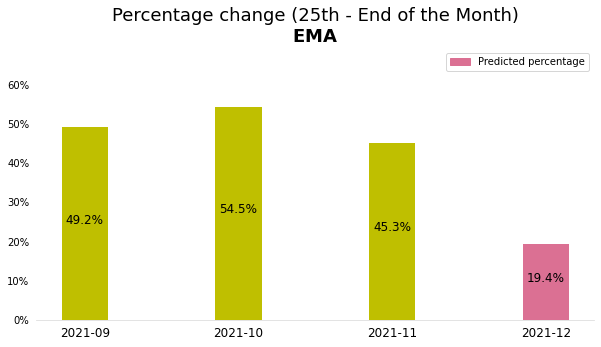

In [28]:
def addlabelsk(x,y):
    for i in range(len(x)):
        plt.text(i, (y[i]-(0.5*y[i])), str(y[i])+'%', ha = 'center',fontsize=12,color='Black',fontstyle='normal')

plt.figure(figsize = (10,5))
xpos=np.arange(len(k3))
plt.bar(xpos,q3,width=0.3,color=('y','y','y','palevioletred'))
plt.xticks(xpos,k3,fontsize=12)
addlabelsk(k3,q3)

ax=plt.gca()
plt.title('Percentage change (25th - End of the Month)\n' r"$\bf{"'EMA'"}$",fontsize=18,color='Black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
plt.ylim(0, max(q3)+15)
legend = plt.legend(['Predicted percentage'])
legend.get_patches()[0].set_color('palevioletred')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig(r'C:\Users\ROHP\Downloads\Works\Predictive Analysis\Sales Order Development\To Predict 25-30 Realized orders\EMA percentage-Lasso.jpg', dpi=240, bbox_inches='tight')

In [29]:
Global_df=df
Global_df['Y-M']=Global_df['Year'].astype(str) + '-' + Global_df['Month'].astype(str)
Global_df=pd.DataFrame(df.groupby(['Y-M']).sum()[['OO_net_on_25th','OO_net_on_MonthEnd']]).reset_index()
Global_df1=Global_df.sort_values('Y-M',ascending=True)
Global_df2=Global_df1.tail(3)
Global_df2
pr['Y-M']=pr['Year'].astype(str) + '-' + pr['Month'].astype(str)
pr1=pd.DataFrame(pr.groupby(['Y-M']).sum()[['OO_net_on_25th','Predicted_OO_net_on_MonthEnd']]).reset_index()
pr1['OO_net_on_MonthEnd']=pr1['Predicted_OO_net_on_MonthEnd']
pr1.drop(columns=['Predicted_OO_net_on_MonthEnd'],inplace=True)
Global_df2=pd.concat([Global_df2,pr1])
Global_df2=Global_df2.sort_values('Y-M',ascending=True).reset_index()
Global_df2

,index,Y-M,OO_net_on_25th,OO_net_on_MonthEnd
0,6,2021-09,871.98,1327.90
1,7,2021-10,837.35,1231.15
2,8,2021-11,989.45,1326.51
3,0,2021-12,914.95,1132.25


In [30]:
Global_Percentages=list(((Global_df2['OO_net_on_MonthEnd']-Global_df2['OO_net_on_25th'])*100/Global_df2['OO_net_on_25th']).round(1))
Global_Percentages

[52.3, 47.0, 34.1, 23.7]

In [31]:
k4=list(Global_df2['Y-M'])
q4=Global_Percentages

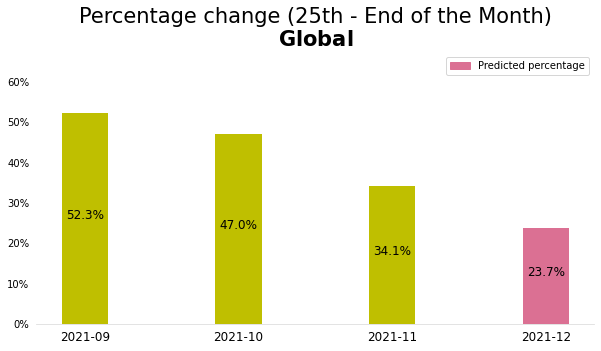

In [32]:
def addlabelsk(x,y):
    for i in range(len(x)):
        plt.text(i, (y[i]-(0.5*y[i])), str(y[i])+'%', ha = 'center',fontsize=12,color='Black',fontstyle='normal')

plt.figure(figsize = (10,5))
xpos=np.arange(len(k4))
plt.bar(xpos,q4,width=0.3,color=('y','y','y','palevioletred'))
plt.xticks(xpos,k4,fontsize=12)
addlabelsk(k4,q4)

ax=plt.gca()
plt.title('Percentage change (25th - End of the Month)\n' r"$\bf{"'Global'"}$",fontsize=21,color='Black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
plt.ylim(0, max(q4)+15)
legend = plt.legend(['Predicted percentage'])
legend.get_patches()[0].set_color('palevioletred')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig(r'C:\Users\ROHP\Downloads\Works\Predictive Analysis\Sales Order Development\To Predict 25-30 Realized orders\Global percentage-Lasso.jpg', dpi=240, bbox_inches='tight')

In [33]:
baseline_file=pd.read_excel(r'C:\Users\ROHP\Downloads\Works\Predictive Analysis\Sales Order Development\To Predict 25-30 Realized orders\feed.xlsx','Baseline')
baseline_file.head()

,Region,Baseline OO_net_on_MonthEnd
0,America,569
1,APAC,243
2,EMA,384


In [34]:
new_df = pr.query("Region == 'America'")
PresentMonth_america_25th=(new_df['OO_net_on_25th'].iloc[0])
PresentMonth_america_EndPrediction=(new_df['Predicted_OO_net_on_MonthEnd'].iloc[0])

new_baseline_file = baseline_file.query("Region == 'America'")
PresentMonth_america_Baseline=(new_baseline_file['Baseline OO_net_on_MonthEnd'].iloc[0])

print('America')
PresentMonth_america_25th,PresentMonth_america_EndPrediction,PresentMonth_america_Baseline

America


(407.29, 517.2, 569)

In [35]:
new_df = pr.query("Region == 'APAC'")
PresentMonth_apac_25th=(new_df['OO_net_on_25th'].iloc[0])
PresentMonth_apac_EndPrediction=(new_df['Predicted_OO_net_on_MonthEnd'].iloc[0])

new_baseline_file = baseline_file.query("Region == 'APAC'")
PresentMonth_apac_Baseline=(new_baseline_file['Baseline OO_net_on_MonthEnd'].iloc[0])

print('APAC')
PresentMonth_apac_25th,PresentMonth_apac_EndPrediction,PresentMonth_apac_Baseline

APAC


(181.8, 226.11, 243)

In [36]:
new_df = pr.query("Region == 'EMA'")
PresentMonth_ema_25th=(new_df['OO_net_on_25th'].iloc[0])
PresentMonth_ema_EndPrediction=(new_df['Predicted_OO_net_on_MonthEnd'].iloc[0])

new_baseline_file = baseline_file.query("Region == 'EMA'")
PresentMonth_ema_Baseline=(new_baseline_file['Baseline OO_net_on_MonthEnd'].iloc[0])

print('EMA')
PresentMonth_ema_25th,PresentMonth_ema_EndPrediction,PresentMonth_ema_Baseline

EMA


(325.86, 388.94, 384)

## previous month's values from same feed.xlsx

In [37]:
PreviousMonthEnd_file=pd.read_excel(r'C:\Users\ROHP\Downloads\Works\Predictive Analysis\Sales Order Development\To Predict 25-30 Realized orders\feed.xlsx','Previous MonthEnd Released')
PreviousMonthEnd_file.head()

,Region,Previous MonthEnd Realised value
0,America,536.41
1,APAC,265.89
2,EMA,524.21


In [38]:
PreviousMonth_america_End_Realised=PreviousMonthEnd_file['Previous MonthEnd Realised value'][0]
PreviousMonth_apac_End_Realised=PreviousMonthEnd_file['Previous MonthEnd Realised value'][1]
PreviousMonth_ema_End_Realised=PreviousMonthEnd_file['Previous MonthEnd Realised value'][2]
PreviousMonth_america_End_Realised, PreviousMonth_apac_End_Realised, PreviousMonth_ema_End_Realised

(536.41, 265.89, 524.21)

>Output: Calculations Discriptive points
 <br>Note:
 <br>1. Inplace of 25th type 25thMonth, in every descriptive cell
 <br>2. If the value is -ve change sentence to less than

In [39]:
PresentMonth_global_25th = PresentMonth_america_25th + PresentMonth_ema_25th + PresentMonth_apac_25th
PresentMonth_global_EndPrediction = PresentMonth_america_EndPrediction + PresentMonth_ema_EndPrediction + PresentMonth_apac_EndPrediction
PresentMonth_global_Baseline = PresentMonth_america_Baseline + PresentMonth_ema_Baseline + PresentMonth_apac_Baseline
PreviousMonth_global_End_Realised = PreviousMonth_america_End_Realised + PreviousMonth_ema_End_Realised + PreviousMonth_apac_End_Realised
print('Global')
print('This is expected to take the Realized Value from',int(round(PresentMonth_global_25th,0)),'to',int(round(PresentMonth_global_EndPrediction,0)),'(', round(PresentMonth_global_EndPrediction*100/PresentMonth_global_Baseline,0), '%', 'against Baseline of', PresentMonth_global_Baseline, 'mDKK) as on 25th.')
print(int(round(PresentMonth_global_EndPrediction-PresentMonth_global_Baseline,0)), 'mDKK more than Baseline and', int(round(PresentMonth_global_EndPrediction-PreviousMonth_global_End_Realised,0)), 'mDKK more than Previous month’s.')

Global
This is expected to take the Realized Value from 915 to 1132 ( 95.0 % against Baseline of 1196 mDKK) as on 25th.
-64 mDKK more than Baseline and -194 mDKK more than Previous month’s.


In [40]:
PresentMonth_america_EndPrediction-PreviousMonth_america_End_Realised

-19.209999999999923

In [41]:
print('America')
print('This is expected to take the Realized Value from',int(round(PresentMonth_america_25th,0)),'to',int(round(PresentMonth_america_EndPrediction,0)),'(', round(PresentMonth_america_EndPrediction*100/PresentMonth_america_Baseline,0), '%', 'against Baseline of', PresentMonth_america_Baseline, 'mDKK) as on 25th.')
print(int(round(PresentMonth_america_EndPrediction-PresentMonth_america_Baseline,0)), 'mDKK more than Baseline and', int(round(PresentMonth_america_EndPrediction-PreviousMonth_america_End_Realised,0)), 'mDKK more than Previous month’s.')

America
This is expected to take the Realized Value from 407 to 517 ( 91.0 % against Baseline of 569 mDKK) as on 25th.
-52 mDKK more than Baseline and -19 mDKK more than Previous month’s.


In [42]:
print('EMA')
print('This is expected to take the Realized Value from',int(round(PresentMonth_ema_25th,0)),'to',int(round(PresentMonth_ema_EndPrediction,0)),'(', round(PresentMonth_ema_EndPrediction*100/PresentMonth_ema_Baseline,0), '%', 'against Baseline of', PresentMonth_ema_Baseline, 'mDKK) as on 25th.')
print(int(round(PresentMonth_ema_EndPrediction-PresentMonth_ema_Baseline,0)), 'mDKK more than Baseline and', int(round(PresentMonth_ema_EndPrediction-PreviousMonth_ema_End_Realised,0)), 'mDKK more than Previous month’s.')

EMA
This is expected to take the Realized Value from 326 to 389 ( 101.0 % against Baseline of 384 mDKK) as on 25th.
5 mDKK more than Baseline and -135 mDKK more than Previous month’s.


In [43]:
print('APAC')
print('This is expected to take the Realized Value from',int(round(PresentMonth_apac_25th,0)),'to',int(round(PresentMonth_apac_EndPrediction,0)),'(', round(PresentMonth_apac_EndPrediction*100/PresentMonth_apac_Baseline,0), '%', 'against Baseline of', PresentMonth_apac_Baseline, 'mDKK) as on 25th.')
print(int(round(PresentMonth_apac_EndPrediction-PresentMonth_apac_Baseline,0)), 'mDKK more than Baseline and', int(round(PresentMonth_apac_EndPrediction-PreviousMonth_apac_End_Realised,0)), 'mDKK more than Previous month’s.')

APAC
This is expected to take the Realized Value from 182 to 226 ( 93.0 % against Baseline of 243 mDKK) as on 25th.
-17 mDKK more than Baseline and -40 mDKK more than Previous month’s.
